<a href="https://colab.research.google.com/github/bitprj/DigitalHistory/blob/Shayan/Week9-Analyzing-Freedom-on-the-Move/Week9-Analyzing-Freedom-on-the-Move.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center">Freedom on the Move</div>

# Recap
- Throughout this curriculum we have worked learn and implemented several methods of data analysis. Some of these are:
- Using Python and Pandas to load dataframes.
- Cleaning and organizing our dataframes.
- Using `matplotlib`, `pandas` and `seaborn` for simple to advanced visualziations.

By this time, you should have an understanding of how to implement the following:
- Loading Dataframes, modifying columns (for e.g adding a new column).
- Modifying `NaN` values in our dataset .
- Using `df.plot` to plot basic plots such as histograms, bar, line and scatter plots.
- Using `sns.relplot` to plot numerical plots
- Using `sns.catplot` to plot categorical data.

# About the Dataset





### Freedom on the Move
<p align="center">
<img src="https://freedomonthemove.org/images/freedom.png" width="200"> 
</p>


### Facts about the dataset

- Freedom on the Move is a database of fugitives from North American slavery.
- They are compiling thousands of stories of resistance that have never been accessible in one place.

- Research driven by us.
- A database full of possibilities.


You can read more about the dataset [here](https://freedomonthemove.org/).

# Practicum and Methodology



# Grading

This exercise has a total of 27 questions. Every question has 1 point. Some questions might have multiple parts but the weight of the question is the same.

In order to work on the questions in this Practicum and submit them for grading, you'll need to run the code block below. It will ask for your student ID number and then create a folder that will house your answers for each question. At the very end of the notebook, there is a code section that will download this folder as a zip file to your computer. This zip file will be your final submission.

In [ ]:
import os
import shutil

!rm -rf sample_data

student_id = input('Please Enter your Student ID: ') # Enter Student ID.

while len(student_id) != 9:
 student_id = int('Please Enter your Student ID: ')  
  
folder_location = f'{student_id}/Week_Six/Practicum'
if not os.path.exists(folder_location):
  os.makedirs(folder_location)
  print('Successfully Created Directory, Lets get started')
else:
  print('Directory Already Exists')

## Load Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#import numpy as np

## Load Dataset

In [2]:
url = 'https://bit.ly/3kVBMnZ'

fotm_dataset = pd.read_csv(url, encoding = "ISO-8859-1")

## Using `Pandas` to extract basic information 

### Print the names of all the columns

In [3]:
fotm_dataset.columns # INSERT CODE HERE

Index(['advertisement.publication_date', 'advertisement.complete',
       'advertiser.name', 'enslaved_person.gender',
       'enslaved_person_languages.does_speak', 'enslaver.fullname',
       'enslaver.gender', 'enslaver.type', 'newspaper.name',
       'runaway.ran_before', 'runaway.profess_freedom',
       'runaway_enslavers.enslaver_status', 'runaway_reward.amount',
       'newspaper_location.city', 'newspaper_location.state',
       'enslaver_location.city', 'enslaver_location.state', 'advertisement.id',
       'advertiser.id', 'newspaper.id', 'newspaper_location.id',
       'runaway_event.id', 'runaway.id', 'enslaved_person.id',
       'enslaved_person_languages.id', 'runaway_enslavers.id', 'enslaver.id',
       'enslaver_location.id', 'runaway_reward.id'],
      dtype='object')

### `Head()`

In [4]:
fotm_dataset.head()

,advertisement.publication_date,advertisement.complete,advertiser.name,enslaved_person.gender,enslaved_person_languages.does_speak,enslaver.fullname,enslaver.gender,enslaver.type,newspaper.name,runaway.ran_before,runaway.profess_freedom,runaway_enslavers.enslaver_status,runaway_reward.amount,newspaper_location.city,newspaper_location.state,enslaver_location.city,enslaver_location.state,advertisement.id,advertiser.id,newspaper.id,newspaper_location.id,runaway_event.id,runaway.id,enslaved_person.id,enslaved_person_languages.id,runaway_enslavers.id,enslaver.id,enslaver_location.id,runaway_reward.id
0,1829-12-19,True,NaN,FEMALE,NaN,Vance,OTHER,estate,Charleston Mercury,NaN,NaN,NaN,20.0,Charleston,US-SC,Charleston,US-SC,00009a54-8ed0-44a3-8983-7534c5001172,NaN,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,dbe0cc3f-0898-4eaf-b702-8be2143d970a,577eef00-d0db-463d-8f5a-ca03282733f4,05a63752-e272-48f6-9050-72590c5d7ac9,30efbcb3-23c1-48f5-a349-c34daea5d1fb
1,1829-12-19,True,NaN,FEMALE,NaN,Vance,OTHER,estate,Charleston Mercury,NaN,NaN,NaN,10.0,Charleston,US-SC,Charleston,US-SC,00009a54-8ed0-44a3-8983-7534c5001172,NaN,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,dbe0cc3f-0898-4eaf-b702-8be2143d970a,577eef00-d0db-463d-8f5a-ca03282733f4,05a63752-e272-48f6-9050-72590c5d7ac9,0d52b7d0-7bdd-48c6-acb0-ff3db30a16bb
2,1829-12-19,True,NaN,FEMALE,NaN,WM. H. Smith,MALE,current,Charleston Mercury,NaN,NaN,NaN,20.0,Charleston,US-SC,Charleston,US-SC,00009a54-8ed0-44a3-8983-7534c5001172,NaN,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,d7796415-33de-4725-b41b-451b47ba7266,ea1637f3-cfd3-4aef-be71-3e090e8526e1,b7ef3786-2260-4cd1-afcf-14776d07af90,30efbcb3-23c1-48f5-a349-c34daea5d1fb
3,1829-12-19,True,NaN,FEMALE,NaN,WM. H. Smith,MALE,current,Charleston Mercury,NaN,NaN,NaN,10.0,Charleston,US-SC,Charleston,US-SC,00009a54-8ed0-44a3-8983-7534c5001172,NaN,12d38785-dfdf-4dbc-a9c6-3ccb0e8d6448,0afd2704-9c29-4f31-9ffe-3627c61e7958,6bb670ae-7ec5-41e1-95b4-d4421015b17f,7c1d52e1-2b99-4372-a7c2-012430871cf1,664075ec-2c11-474e-b1ef-8ed120643658,NaN,d7796415-33de-4725-b41b-451b47ba7266,ea1637f3-cfd3-4aef-be71-3e090e8526e1,b7ef3786-2260-4cd1-afcf-14776d07af90,0d52b7d0-7bdd-48c6-acb0-ff3db30a16bb
4,1830-01-02,True,"Wm. B. Roberts, Executor",MALE,NaN,Rev. Henry Holmes,MALE,deceased,Edenton Gazette And North Carolina General Adv...,NaN,NaN,NaN,15.0,Edenton,US-NC,NaN,US-NC,0001aa96-153e-49e9-9cc1-78ff29cad12f,be248ed4-c224-448a-9db2-23204e05392d,ce244760-13c7-4c98-bfc5-0b6b8cb454f4,dd33c07c-80c1-4d46-b25b-1daf33b57a79,f6f30219-bf53-4835-b90b-68d587aef3ef,cf69ceec-0b4b-4b5c-98bf-bffab1e488c1,bb232988-8487-470f-bc62-d12aa8665d8d,NaN,3f39bcb6-873e-41ed-b8a2-5546d2117e22,ecb5b127-f7f4-4e7c-88fd-b325524a6853,d3cbbc85-a3df-4c44-b689-71693643a223,375fc31d-c80b-4fe5-a95d-728c1a0f96bf


### `Tail()`

In [5]:
fotm_dataset.tail()

,advertisement.publication_date,advertisement.complete,advertiser.name,enslaved_person.gender,enslaved_person_languages.does_speak,enslaver.fullname,enslaver.gender,enslaver.type,newspaper.name,runaway.ran_before,runaway.profess_freedom,runaway_enslavers.enslaver_status,runaway_reward.amount,newspaper_location.city,newspaper_location.state,enslaver_location.city,enslaver_location.state,advertisement.id,advertiser.id,newspaper.id,newspaper_location.id,runaway_event.id,runaway.id,enslaved_person.id,enslaved_person_languages.id,runaway_enslavers.id,enslaver.id,enslaver_location.id,runaway_reward.id
9064,1844-01-12,False,Lucien Labranche,MALE,NaN,NaN,NaN,NaN,The Daily Picayune,NaN,NaN,NaN,NaN,New Orleans,US-LA,NaN,NaN,2f29cbd6-d1a7-4c10-8443-7e2c10713b4b,0fc031d2-7770-4f65-b1c0-06797dc4a9e3,c5993adc-4bee-4c12-a104-9bf7119308af,026f5472-34b7-4c69-aff8-9ae5cd62e07a,2f6dc910-1050-49dc-844f-0c8e043c75fd,1d83e9fa-3963-44a7-a53f-c8d9515ab2bb,a92afc5b-ea7b-4f6b-9e90-a5f9a645bd3a,NaN,NaN,NaN,NaN,NaN
9065,1825-08-03,False,NaN,NOT_PROVIDED,NaN,Fred Fraser Esq of Ashepoo,MALE,NOT_PROVIDED,Charleston Courier,NaN,NaN,NaN,20.0,Charleston,US-SC,NaN,NaN,2f2baffe-b52e-41c6-80f8-29d46c7a7675,NaN,7d2db9a0-67dc-4356-ad21-02fbd93cbb10,0afd2704-9c29-4f31-9ffe-3627c61e7958,fbf32ec3-f2b2-4a37-8dec-285a7c4f5dff,837adcad-b137-4541-bcdf-05d6fed53e43,a747822e-1534-411a-b196-b0c7e1a09309,NaN,983b23d6-c7a9-4c85-a3b7-6113d241757d,f79d6080-eb35-4cab-ada9-4f46c3ce6089,NaN,4f9f226d-ddad-4c5d-acbc-310dedc80cda
9066,1823-11-03,False,NaN,NaN,NaN,NaN,NaN,NaN,Charleston Courier,NaN,NaN,NaN,NaN,Charleston,US-SC,NaN,NaN,2f2ebf96-6c51-47a9-bbd0-31af47a9a92b,NaN,7d2db9a0-67dc-4356-ad21-02fbd93cbb10,0afd2704-9c29-4f31-9ffe-3627c61e7958,2aa79a98-8ce3-4720-a3d0-10b1707d41c6,2bfdf04f-2098-4a28-a746-a5db15da6b0b,277f0ea0-a0d5-4e3b-b6a0-d949134b7a8a,NaN,NaN,NaN,NaN,NaN
9067,1844-01-02,False,NaN,NaN,NaN,NaN,NaN,NaN,Milledgeville Federal Union,NaN,NaN,NaN,NaN,Milledgeville,US-GA,NaN,NaN,2f307717-7b4d-4562-a2dc-fc199b8344b3,NaN,2b017d87-53a2-43b3-b27d-bbc507ea340b,507b5968-86b7-476e-a83d-a4307622ed57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9068,1737-04-28,False,NaN,NaN,NaN,NaN,NaN,NaN,The Boston News-Letter,NaN,NaN,NaN,NaN,,US-MA,NaN,NaN,2f320a2b-c49b-4155-8f68-0d8cbda29818,NaN,bbc3d8c7-0279-4967-8523-5691b539e902,3e8eac54-91e7-4f3f-ab9e-3bf2905eefe5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### `info()`

In [6]:
fotm_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   advertisement.publication_date        9069 non-null   object 
 1   advertisement.complete                9069 non-null   bool   
 2   advertiser.name                       2549 non-null   object 
 3   enslaved_person.gender                7525 non-null   object 
 4   enslaved_person_languages.does_speak  1456 non-null   object 
 5   enslaver.fullname                     6886 non-null   object 
 6   enslaver.gender                       6938 non-null   object 
 7   enslaver.type                         6762 non-null   object 
 8   newspaper.name                        9069 non-null   object 
 9   runaway.ran_before                    391 non-null    object 
 10  runaway.profess_freedom               478 non-null    object 
 11  runaway_enslavers

### `Describe()`

In [7]:
fotm_dataset.describe()

# Try this
#fotm_dataset.describe(include='all')

,runaway_enslavers.enslaver_status,runaway_reward.amount
count,0.0,5332.000000
mean,NaN,42.365154
std,NaN,155.161401
min,NaN,1.000000
25%,NaN,10.000000
50%,NaN,20.000000
75%,NaN,50.000000
max,NaN,10000.000000


# Step 1 - Cleaning our dataset 

### Q1 - Removing columns that have `.id` in them.

You'll notice that there are many "ID" columns. We won't be needing any of these, so it's best to remove them. Drop these columns and store the remaining data in a variable called `fotm_dataset_without_id`.

In [8]:
columns_to_remove = ['runaway_reward.id','enslaver_location.id','enslaver.id',
                     'runaway_enslavers.id','enslaved_person_languages.id',
                     'enslaved_person.id','runaway.id','runaway_event.id',
                     'advertiser.id','newspaper_location.id','newspaper.id',
                     'advertisement.id'] # INSERT CODE HERE

In [9]:
fotm_dataset_without_id = fotm_dataset.drop(columns = columns_to_remove)

### Q2 - Removing columns that have a large quantities of `nan` values.

From the chart below, you'll notice that some columns have a large amount of null values. We'll be keeping some of them, but for the rest, we'll just drop them from the dataset. Specifically, from the columns that have 1000 or more null values, we wish to remove the following"

- `advertiser.name` 
- `enslaved_person_languages.does_speak`
- `enslaver.fullname`
- `runaway.ran_before`
- `runaway.profess_freedom`
- `runaway_enslavers.enslaver_status`
- `enslaver_location.city`
- `enslaver_location.state`

Every other column should be kept.

In [10]:
fotm_dataset_without_id.isna().sum()

advertisement.publication_date             0
advertisement.complete                     0
advertiser.name                         6520
enslaved_person.gender                  1544
enslaved_person_languages.does_speak    7613
enslaver.fullname                       2183
enslaver.gender                         2131
enslaver.type                           2307
newspaper.name                             0
runaway.ran_before                      8678
runaway.profess_freedom                 8591
runaway_enslavers.enslaver_status       9069
runaway_reward.amount                   3737
newspaper_location.city                  110
newspaper_location.state                   0
enslaver_location.city                  5627
enslaver_location.state                 4089
dtype: int64

In [11]:
more_columns = ['advertiser.name', 'enslaved_person_languages.does_speak','enslaver.fullname',
                'runaway.ran_before', 'runaway.profess_freedom','runaway_enslavers.enslaver_status',
                "enslaver_location.city","enslaver_location.state"]

In [12]:
fotm_dataset_without_id= fotm_dataset_without_id.drop(columns = more_columns)

### Saving our dataframe

In [13]:
## Making a copy of our modified dataset
fotm_dataframe = fotm_dataset_without_id.copy(deep = True)

### Q3 - Adding a new column

Create a new column called `year` within `fotm_dataframe` that is the result of first converting the `advertisement.publication_date` to a datetime object and then setting that object to have a yearly frequency. (This requires the `.to_period()` method).

In [14]:
fotm_dataframe['year'] = pd.to_datetime(fotm_dataframe['advertisement.publication_date']).dt.to_period('Y')

In [15]:
fotm_dataframe.columns

Index(['advertisement.publication_date', 'advertisement.complete',
       'enslaved_person.gender', 'enslaver.gender', 'enslaver.type',
       'newspaper.name', 'runaway_reward.amount', 'newspaper_location.city',
       'newspaper_location.state', 'year'],
      dtype='object')

## Find 'Unique' strings and `NaN` values for each of the remaining columns

Replace string values that are inconsistent with 'Unknown'. Do the same for NaN values.

### Q4 - Cleaning the ```enslaved_person.gender``` column

In [16]:
fotm_dataframe['enslaved_person.gender'].unique()

array(['FEMALE', 'MALE', nan, 'NOT_PROVIDED', 'OTHER'], dtype=object)

In [17]:
fotm_dataframe['enslaved_person.gender']= fotm_dataframe['enslaved_person.gender'].fillna(value='UNKNOWN')#, method=None, axis=None, inplace=True)


In [18]:
fotm_dataframe["enslaved_person.gender"] = fotm_dataframe["enslaved_person.gender"].replace({"NOT_PROVIDED": "UNKNOWN"})

In [19]:
fotm_dataframe['enslaved_person.gender'].unique()

array(['FEMALE', 'MALE', 'UNKNOWN', 'OTHER'], dtype=object)

### Q5 - Cleaning the ```enslaver.gender``` column

In [20]:
fotm_dataframe['enslaver.gender'].unique()

array(['OTHER', 'MALE', 'NOT_PROVIDED', nan, 'FEMALE'], dtype=object)

In [21]:
fotm_dataframe['enslaver.gender'] = fotm_dataframe['enslaver.gender'].fillna(value='UNKNOWN')

In [22]:
fotm_dataframe['enslaver.gender'] = fotm_dataframe["enslaver.gender"].replace({"NOT_PROVIDED": "UNKNOWN"})

In [23]:
fotm_dataframe['enslaver.gender'].unique()

array(['OTHER', 'MALE', 'UNKNOWN', 'FEMALE'], dtype=object)

### Q6 - Cleaning the ```enslaver.type``` column

In [24]:
fotm_dataframe['enslaver.type'].unique()

array(['estate', 'current', 'deceased', 'NOT_PROVIDED', 'former',
       'alleged', nan], dtype=object)

In [25]:
fotm_dataframe['enslaver.type'] = fotm_dataframe['enslaver.type'].fillna(value='UNKNOWN')

In [26]:
fotm_dataframe['enslaver.type'] = fotm_dataframe["enslaver.type"].replace({"NOT_PROVIDED": "UNKNOWN"})

In [27]:
fotm_dataframe['enslaver.type'].unique()

array(['estate', 'current', 'deceased', 'UNKNOWN', 'former', 'alleged'],
      dtype=object)

### Q7 - Cleaning the ```runaway_reward.amount``` column

One of these line following lines of code for this section is not necessary, find the line and comment it.

In [28]:
fotm_dataframe['runaway_reward.amount'].unique()

array([2.00e+01, 1.00e+01, 1.50e+01, 9.00e+01, 5.00e+01,      nan,
       1.00e+02, 2.00e+02, 2.00e+00, 2.50e+01, 4.00e+01, 8.00e+00,
       1.00e+00, 7.00e+01, 3.00e+01, 3.00e+00, 5.00e+00, 6.00e+00,
       4.00e+00, 2.50e+02, 7.50e+01, 5.00e+02, 3.00e+02, 1.50e+02,
       6.00e+01, 5.90e+01, 4.50e+01, 1.00e+03, 5.50e+01, 2.90e+01,
       8.20e+02, 2.30e+01, 4.00e+02, 3.50e+01, 2.10e+01, 3.00e+03,
       2.40e+01, 1.00e+04, 1.35e+02, 2.25e+02, 9.50e+02, 1.30e+01,
       3.20e+02, 6.10e+01, 1.60e+01])

In [29]:
fotm_dataframe['runaway_reward.amount'] = fotm_dataframe['runaway_reward.amount'].fillna(value=0.0)

In [ ]:
#fotm_dataset_modified["runaway_reward.amount"].replace({"NOT_PROVIDED": "UNKNOWN"}, inplace=True)

In [30]:
fotm_dataframe['runaway_reward.amount'].unique().astype(int)

array([   20,    10,    15,    90,    50,     0,   100,   200,     2,
          25,    40,     8,     1,    70,    30,     3,     5,     6,
           4,   250,    75,   500,   300,   150,    60,    59,    45,
        1000,    55,    29,   820,    23,   400,    35,    21,  3000,
          24, 10000,   135,   225,   950,    13,   320,    61,    16])

### Q8 - Cleaning the ```newspaper_location.city``` column

In [31]:
fotm_dataframe['newspaper_location.city'].unique()

array(['Charleston', 'Edenton', 'Wilmington', 'Washington', 'New Orleans',
       'Mobile', 'Huntsville', 'Raleigh', 'Philadelphia', nan,
       'Milledgeville', 'Newark', 'Nashville', 'New Bern', 'Halifax', ' ',
       'Hillsborough', 'Cahawba', 'Richmond', 'Fayetteville',
       'Greensboro', 'Salisbury', 'Tuscaloosa', 'Goldsboro',
       'Elizabeth City', 'Montgomery', 'Burlington', 'Charlotte',
       'Milton', 'Clinton', 'Oxford', 'Asheboro', 'Tarboro', 'Chatham',
       'Concord', 'Asheville', 'Rutherfordton', 'Murfreesboro',
       'Lincolnton', 'Warrenton', 'Winston-salem', 'Harrington',
       'Louisburg', 'Wadesboro', 'Wilson'], dtype=object)

In [32]:
fotm_dataframe['newspaper_location.city'] = fotm_dataframe['newspaper_location.city'].fillna(value='UNKNOWN')    #touch templates/index.html

In [33]:
fotm_dataframe['newspaper_location.city'] = fotm_dataframe["newspaper_location.city"].replace({" ": "UNKNOWN"})

In [34]:
fotm_dataframe['newspaper_location.city'].unique()

array(['Charleston', 'Edenton', 'Wilmington', 'Washington', 'New Orleans',
       'Mobile', 'Huntsville', 'Raleigh', 'Philadelphia', 'UNKNOWN',
       'Milledgeville', 'Newark', 'Nashville', 'New Bern', 'Halifax',
       'Hillsborough', 'Cahawba', 'Richmond', 'Fayetteville',
       'Greensboro', 'Salisbury', 'Tuscaloosa', 'Goldsboro',
       'Elizabeth City', 'Montgomery', 'Burlington', 'Charlotte',
       'Milton', 'Clinton', 'Oxford', 'Asheboro', 'Tarboro', 'Chatham',
       'Concord', 'Asheville', 'Rutherfordton', 'Murfreesboro',
       'Lincolnton', 'Warrenton', 'Winston-salem', 'Harrington',
       'Louisburg', 'Wadesboro', 'Wilson'], dtype=object)

### Q9 - Sorting the new dataset

Sort `fotm_dataframe` by `advertisement.publication_date`.

In [35]:
fotm_dataframe = fotm_dataframe.sort_values(by="advertisement.publication_date")

### Q10 - Resetting our index.

In [36]:
fotm_dataframe = fotm_dataframe.reset_index(drop=True)

### Saving our dataframe

In [37]:
# Making a copy of our modified dataset
fotm = fotm_dataframe.copy(deep = True)

### Q11 - Newspaper and the number of advertisments they published

Display each newspaper as well as how many total advertisements they ever published.

In [38]:
fotm['newspaper.name'].value_counts()

The Daily Picayune                            2602
New-Orleans Argus                              998
Charleston Mercury                             683
Milledgeville Federal Union                    579
Nashville Union                                380
                                              ... 
Yadkin And Catawba Journal                       1
The Providence Gazette and Country Journal       1
Weekly Progress                                  1
Greensboro Times                                 1
Carolina Republican                              1
Name: newspaper.name, Length: 157, dtype: int64

### Q12 - Number of Complete vs Incomplete Advertisments

Display the counts of complete advertisments. This will also tell you the number of incomplete ones.

In [40]:
fotm['advertisement.complete'].value_counts()

False    8204
True      865
Name: advertisement.complete, dtype: int64

### Q13 - States with the most advertistments

Display the counts of advertisements published in each state. (HINT: You know where each newspaper is located in one of the columns).

In [41]:
fotm['newspaper_location.state'].value_counts()

US-LA    3748
US-NC    1667
US-SC    1225
US-AL     776
US-GA     628
US-TN     403
US-MA     370
US-NY     110
US-NJ      49
US-CT      34
US-VA      26
US-PA      15
US-NH      13
US-RI       5
Name: newspaper_location.state, dtype: int64

### Q14 - Frequency of reward amount

Display all possible reward amounts as well as the counts of how many advertisements used those amounts.

In [42]:
fotm['runaway_reward.amount'].value_counts()

0.0        3737
10.0       1087
20.0       1000
50.0        809
25.0        717
100.0       433
5.0         289
15.0        174
30.0        173
40.0        166
200.0       134
3.0          38
2.0          37
60.0         32
75.0         31
1.0          29
500.0        28
8.0          21
4.0          17
90.0         16
6.0          15
300.0        14
150.0        12
70.0         11
250.0         8
45.0          4
1000.0        4
23.0          4
21.0          4
35.0          3
61.0          3
59.0          3
400.0         3
55.0          2
10000.0       1
24.0          1
16.0          1
320.0         1
950.0         1
820.0         1
13.0          1
135.0         1
225.0         1
3000.0        1
29.0          1
Name: runaway_reward.amount, dtype: int64

### Q15 - Viewing the number of articles per year.

Display the counts of articles published each year.

In [44]:
fotm['year'].value_counts()

1828    1076
1854     693
1840     633
1846     449
1837     362
        ... 
1742       1
1721       1
1732       1
1723       1
1705       1
Freq: A-DEC, Name: year, Length: 142, dtype: int64

### Q15 - Removing `runaway_reward.amount` >= 2000 and with `runaway_reward.amount < 1.0`  

Now, let's remove the advertisements if `runaway_reward.amount` is less than 1 or greater than or equal to 2000 as these are anomalies in our analysis.

In [45]:
filt = (fotm['runaway_reward.amount'] > 0.0) & (fotm['runaway_reward.amount'] <= 2000)

In [46]:
fotm_amount_between_1_And_2000= fotm.loc[filt]
fotm_amount_between_1_And_2000.shape

(5330, 10)

### Saving our dataframe

We will make a copy of the dataframe we just created and save it as `fotm_visualization` 

In [47]:
# Making a copy of our modified dataset
fotm_visualization = fotm_amount_between_1_And_2000.copy(deep = True)

# Step 2 - Visualizations

## Basic Plots

- Minimum Year is  : 1704
- Maximum Year is  : 1874


In [48]:
fotm_visualization.describe()f

,runaway_reward.amount
count,5330.000000
mean,39.942026
std,61.888032
min,1.000000
25%,10.000000
50%,20.000000
75%,50.000000
max,1000.000000


In [49]:
fotm_visualization['runaway_reward.amount'].median()

20.0

### Q15 - Visualizing runaway_reward.amount vs. advertisement.publication_date

In this question, we will display a scatter plot. 
We will use a dataset where `advertisement.publication_date` is between 1700 and 1750 and `runaway_reward.amount` is greater than the median value of that column and drop na values. 

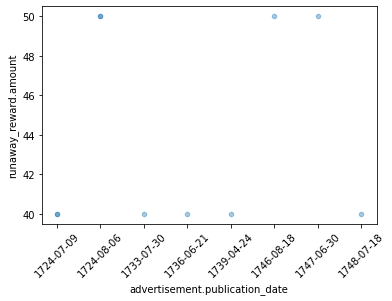

In [50]:
test = fotm_visualization.where((fotm_visualization['advertisement.publication_date'] >='1700') & (fotm_visualization['advertisement.publication_date'] <= '1750') & (fotm_visualization['runaway_reward.amount'] > fotm_visualization['runaway_reward.amount'].median())).dropna()

test.plot(x = 'advertisement.publication_date',
          y='runaway_reward.amount',
          kind = 'scatter',
          rot = 45,
          alpha = 0.4)

### Q16 - Visualizing runaway_reward.amount vs. advertisement.publication_date II

In this question, we will display a scatter plot. 
We will use a dataset where `advertisement.publication_date` is between 1751 and 1800 and `runaway_reward.amount` is greater than the median value of that column and drop na values. 

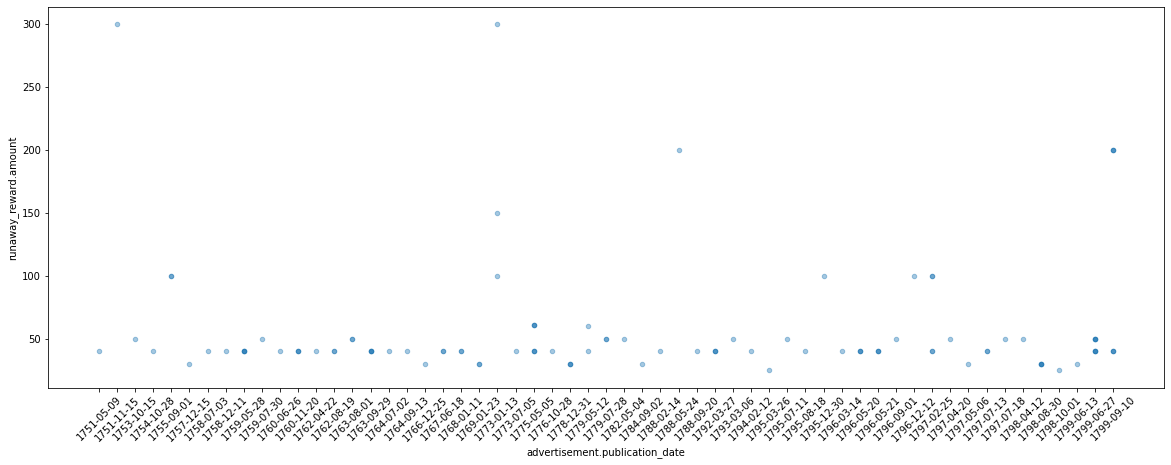

In [52]:
test = fotm_visualization.where((fotm_visualization['advertisement.publication_date'] >='1751') & (fotm_visualization['advertisement.publication_date'] <= '1800')  & (fotm_visualization['runaway_reward.amount'] > fotm_visualization['runaway_reward.amount'].median()) ).dropna()

test.plot(x = 'advertisement.publication_date',
          y='runaway_reward.amount',
          kind = 'scatter',
          rot = 45,
          alpha = 0.4,
          figsize=(20,7))

## Visualization using Seaborn 


 

### Q17 - Visualizing complete and incomplete advertisements

In this question, we will display a bar chart using the `count` of `advertisement.complete` being `True` or `False`.

We will use a dataset where `advertisement.publication_date` is between 1704 and 1750 and drop na values. 

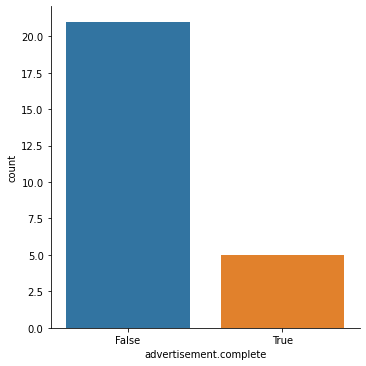

In [ ]:
test = fotm_visualization.loc[(fotm_visualization['advertisement.publication_date'] >='1704') & (fotm_visualization['advertisement.publication_date'] <= '1750')].dropna()

sns.catplot(x = 'advertisement.complete',
            data = test,
            kind = 'count')


### Q18 - Visualizing complete and incomplete advertisements II

In this question, we will display a bar chart using the `count` of `advertisement.complete` being `True` or `False`.

We will use a dataset where `advertisement.publication_date` is between 1751 and 1800 and drop na values. 

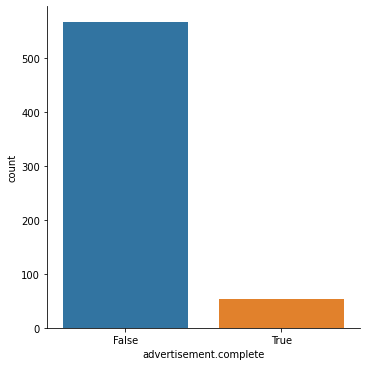

In [58]:
test = fotm_visualization.loc[(fotm_visualization['advertisement.publication_date'] >='1751') & (fotm_visualization['advertisement.publication_date'] <= '1800')].dropna()

sns.catplot(
         x = 'advertisement.complete',
        data = test,
        kind = 'count')


### Q19 - Visualizing complete and incomplete advertisements II

In this question, we will display a bar chart using the `count` of `advertisement.complete` being `True` or `False`.

We will use a dataset where `advertisement.publication_date` is between 1801 and 1874 and drop na values. 

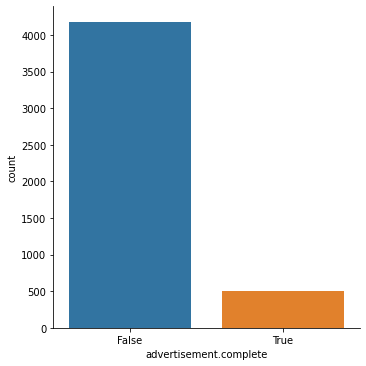

In [ ]:
test = fotm_visualization.loc[(fotm_visualization['advertisement.publication_date'] >='1801') & (fotm_visualization['advertisement.publication_date'] <= '1874')].dropna()

sns.catplot(
         x = 'advertisement.complete',
        data = test,
        kind = 'count')


### Q20 - Visualizing runaway reward amount vs. newspaper location state

In this question, we will display a categorical plot on the state of newspaper location. We will see how reward amounts differed by enslaver type in each state.

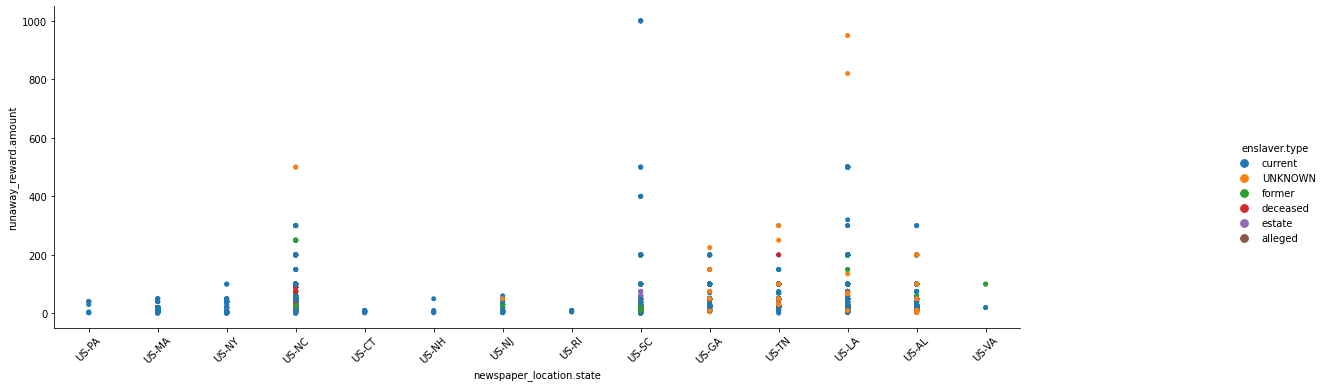

In [ ]:
x = sns.catplot(y = 'runaway_reward.amount',
         x = 'newspaper_location.state',
         hue = 'enslaver.type',
        data = fotm_visualization,
        jitter = False)

x.set_xticklabels(rotation=45)
x.fig.set_figwidth(20)
x.fig.set_figheight(5)

### Q21 - Visualizing runaway reward amount vs. newspaper location state II

In this question, we will display a categorical plot on the state of newspaper location. We will see how reward amounts differed in each state.

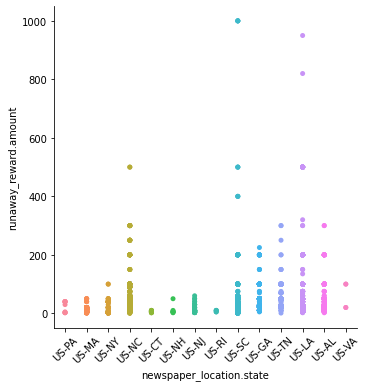

In [ ]:
x = sns.catplot(y = 'runaway_reward.amount',
         x = 'newspaper_location.state',
        data = fotm_visualization,
        jitter = False)

x.set_xticklabels(rotation=45)

### Q22 - Visualizing runaway reward amount vs. newspaper location state III

In this question, we will display a categorical plot on the state of newspaper location. We will see how reward amounts differed in each state using a box plot.

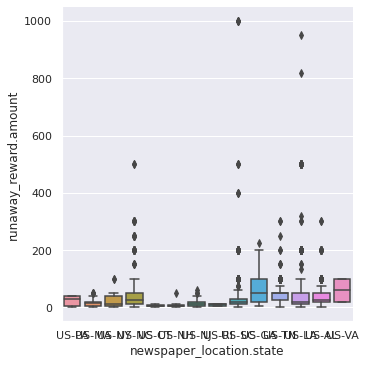

In [ ]:
sns.catplot(y = 'runaway_reward.amount',
         x = 'newspaper_location.state',
        data = fotm_visualization,
        kind = 'box')

### Q23 - Exploring A Newspaper 

Let's select a newspaper `The Daily Picayune` and save the dataframe as `Boston_Letter_Df`.

In [60]:
Boston_Letter_Df = fotm_visualization.loc[fotm_visualization['newspaper.name'] == 'The Daily Picayune']
Boston_Letter_Df

,advertisement.publication_date,advertisement.complete,enslaved_person.gender,enslaver.gender,enslaver.type,newspaper.name,runaway_reward.amount,newspaper_location.city,newspaper_location.state,year
4701,1837-04-11,False,FEMALE,UNKNOWN,UNKNOWN,The Daily Picayune,5.0,New Orleans,US-LA,1837
4702,1837-04-11,False,FEMALE,UNKNOWN,UNKNOWN,The Daily Picayune,10.0,New Orleans,US-LA,1837
4703,1837-04-11,False,FEMALE,UNKNOWN,UNKNOWN,The Daily Picayune,135.0,New Orleans,US-LA,1837
4704,1837-04-11,False,MALE,MALE,current,The Daily Picayune,10.0,New Orleans,US-LA,1837
4712,1837-05-03,False,FEMALE,UNKNOWN,current,The Daily Picayune,5.0,New Orleans,US-LA,1837
...,...,...,...,...,...,...,...,...,...,...
8529,1854-12-19,False,MALE,UNKNOWN,UNKNOWN,The Daily Picayune,10.0,New Orleans,US-LA,1854
8530,1854-12-19,False,MALE,MALE,current,The Daily Picayune,100.0,New Orleans,US-LA,1854
8531,1854-12-31,False,MALE,MALE,current,The Daily Picayune,50.0,New Orleans,US-LA,1854
8532,1854-12-31,False,MALE,MALE,current,The Daily Picayune,25.0,New Orleans,US-LA,1854


### Q24 - Visualizing runaway reward amount vs. enslaver type

In this question, we will use a categorical plot on the enslaver type. We will see how reward amounts differed by enslaver type in `Boston_Letter_Df`.


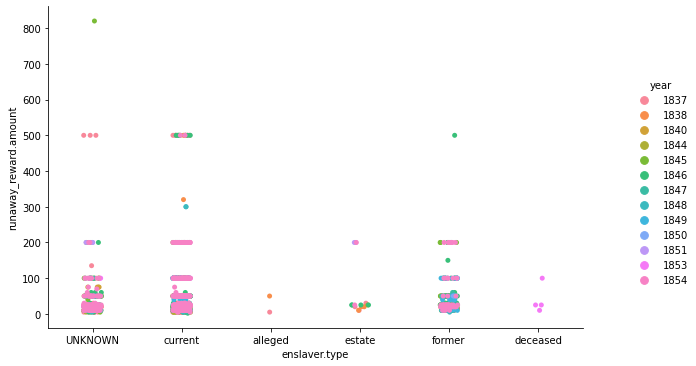

In [ ]:
x = sns.catplot(x = 'enslaver.type',
        y = 'runaway_reward.amount',
        hue = 'year',
        data = Boston_Letter_Df)

x.fig.set_figwidth(10)
x.fig.set_figheight(5)

### Q25 - Looking at a State

Let's select `US-LA` and save the dataframe as `Lousiana_df`.

We will use a categorical plot on year and see what newspapers were used for advertisement each year.

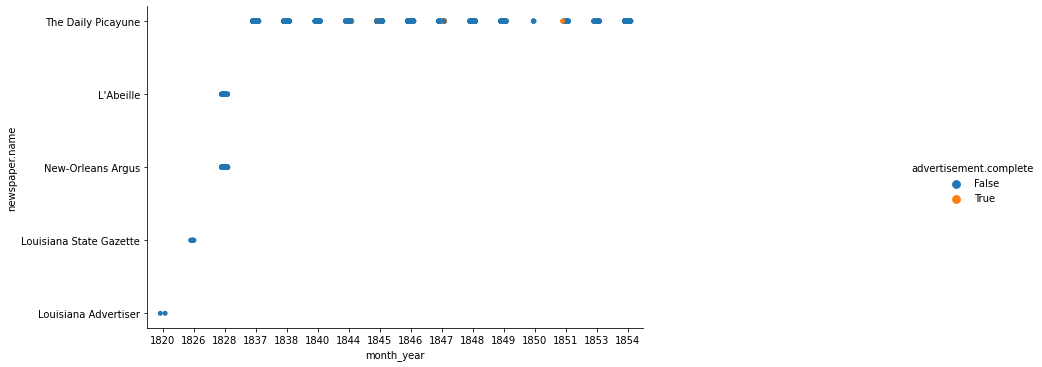

In [ ]:
Lousiana_df = fotm_visualization.loc[fotm_visualization['newspaper_location.state'] == 'US-LA']

g = sns.catplot(y = 'newspaper.name',
        x = 'year',
        hue = 'advertisement.complete',
        data = Lousiana_df)

g.fig.set_figwidth(20)
g.fig.set_figheight(5)

### Q26 - Looking at a State II

Using `Lousiana_df`, we will use a categorical plot on `month_year` and see what newspapers were used for advertisement each year.

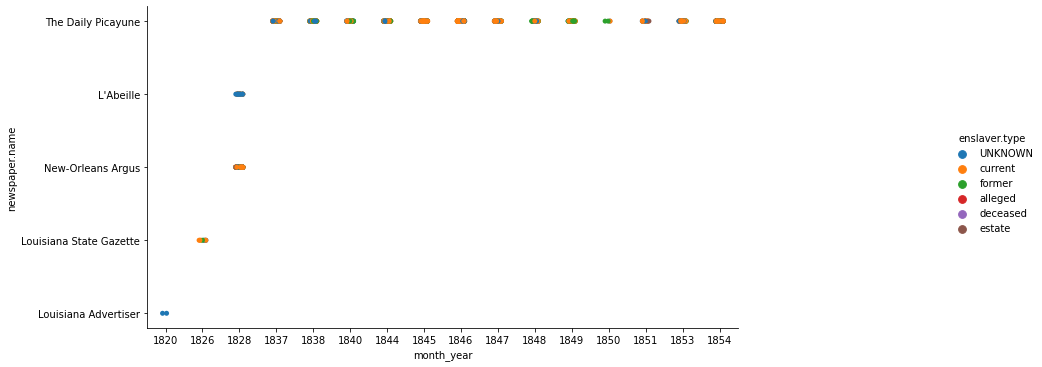

In [ ]:
g = sns.catplot(y = 'newspaper.name',
        x = 'month_year',
        data = Lousiana_df)

g.fig.set_figwidth(20)
g.fig.set_figheight(5)

### Q27 - Looking at a year with the most advertisements

Let's find out a year with the most advertisements.

In [75]:
fotm_visualization['year'].value_counts().head(100)

1854    527
1828    384
1846    341
1844    220
1836    204
1837    192
1840    189
1778    185
1838    173
1845    166
1825    165
1829    145
1822    134
1832    119
1826    107
1847     98
1835     95
1824     77
1803     77
1853     73
1849     73
1813     73
1851     64
1848     63
1839     55
1841     55
1863     53
1821     52
1834     41
1850     39
1831     39
1795     38
1797     36
1823     36
1842     33
1796     32
1810     31
1860     31
1852     27
1820     27
1864     25
1843     25
1798     24
1827     24
1818     24
1793     24
1856     23
1858     23
1859     23
1833     22
1855     22
1861     22
1799     19
1806     17
1857     16
1763     15
1787     14
1816     14
1792     14
1862     14
1776     13
1801     13
1794     13
1788     12
1811     12
1817     12
1819     11
1782     11
1830     10
1804     10
1814     10
1771     10
1781      9
1790      9
1775      8
1791      8
1783      8
1761      7
1773      7
1777      7
1759      7
1762      6
1815      6
1774

Save the dataframe where year is 1854 as `df_1854`.

In [77]:
df_1854 = fotm_visualization.loc[fotm_visualization['year'] == '1854']

We will use a relational plot on newspaper location state vs. runaway reward amount.

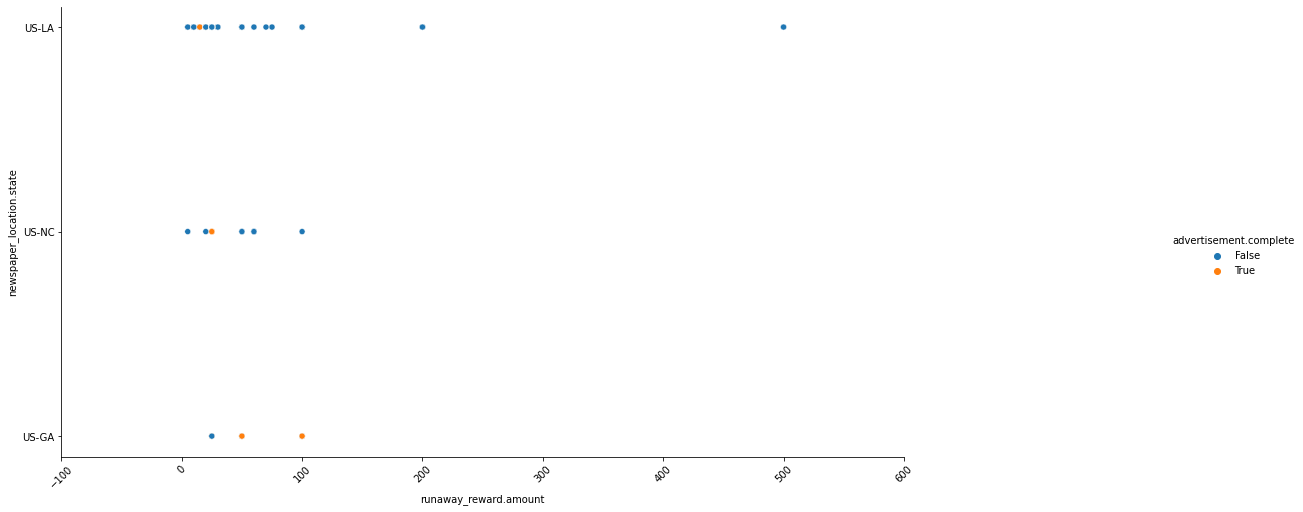

In [78]:
g = sns.relplot(y = 'newspaper_location.state',
                x = 'runaway_reward.amount',
                hue = 'advertisement.complete',
                data = df_1854)

g.set_xticklabels(rotation=45)
g.fig.set_figwidth(20)
g.fig.set_figheight(7)

### Q28 - Looking at a year with the most advertisements II

We will use a categorical plot and display how newspaper city location was different per newspaper. 

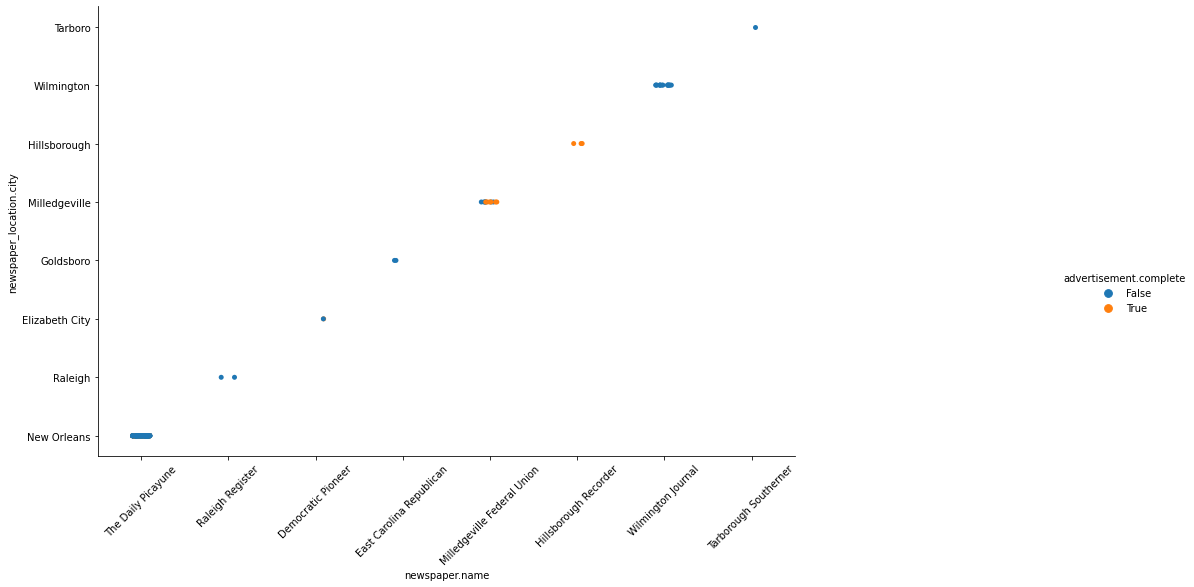

In [79]:
g = sns.catplot(y = 'newspaper_location.city',
            x ='newspaper.name',
            hue = 'advertisement.complete',
            data = df_1854)

g.set_xticklabels(rotation=45)
g.fig.set_figwidth(20)
g.fig.set_figheight(7)

# Conclusion

For this you will write a summary of what steps you followed throughout this notebook, why they were important and your findings.
For example:
- 
- 
- 
- 
- 
- 


You can also add your answers to the questions posted throughout the notebook here. 



## Submission
Run this code block to download your answers.

In [ ]:
from google.colab import files
!zip -r "{student_id}.zip" "{student_id}"
files.download(f"{student_id}.zip")